## Interactive example https://www.3blue1brown.com/lessons/neural-networks
### https://ml4a.github.io/ml4a/looking_inside_neural_nets/
### https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,3&seed=0.19673&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [1]:
import numpy as np
from scipy.ndimage import convolve
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import joblib
from sklearn.utils import shuffle
import os.path
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
print('Fetching and loading MNIST data')
mnist = fetch_openml('mnist_784')

Fetching and loading MNIST data


In [7]:
mnist.target.count()

70000

In [4]:
X, y = mnist.data, mnist.target
X, y = shuffle(X, y, random_state=0)
X2=X[0:4000] # select a part of data
y2=y[0:4000] # select a part of data labels
X_train, X_test, y_train, y_test = train_test_split(X2 / 255., y2, test_size=0.25)
print('Got MNIST with %d training- and %d test samples' % (len(y_train), len(y_test)))
print('Digit distribution in whole dataset:', np.bincount(y2.astype('int32')))

Got MNIST with 3000 training- and 1000 test samples
Digit distribution in whole dataset: [408 452 397 389 382 335 388 442 404 403]


In [8]:
clf = None
PATH = 'mlp_model'
if os.path.exists(PATH):
    print('Loading model from file.')
    clf = joblib.load(PATH).best_estimator_
else:
    print('Training model.')
    # params = {'hidden_layer_sizes': [(256,), (512,), (128, 256, 128,)]}
    params = {'hidden_layer_sizes': [(512,)]}
    mlp = MLPClassifier(verbose=10, momentum=0.9, learning_rate='adaptive', activation='relu')
    clf = GridSearchCV(mlp, params, verbose=10, n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)
    print('Finished with grid search with best mean cross-validated score:', clf.best_score_)
    # print('Best params appeared to be', clf.best_params_)
    joblib.dump(clf, PATH)
    clf = clf.best_estimator_

print('Test accuracy:', clf.score(X_test, y_test))

Training model.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Iteration 1, loss = 1.27937303
Iteration 2, loss = 0.47011289
Iteration 3, loss = 0.32813275
Iteration 4, loss = 0.25812925
Iteration 5, loss = 0.21394010
Iteration 6, loss = 0.18019158
Iteration 7, loss = 0.15517869
Iteration 8, loss = 0.13522772
Iteration 9, loss = 0.11759797
Iteration 10, loss = 0.10679201
Iteration 11, loss = 0.08771453
Iteration 12, loss = 0.07233653
Iteration 13, loss = 0.06339922
Iteration 14, loss = 0.05474025
Iteration 15, loss = 0.04747931
Iteration 16, loss = 0.04062579
Iteration 17, loss = 0.03689980
Iteration 18, loss = 0.03252665
Iteration 19, loss = 0.02774849
Iteration 20, loss = 0.02497685
Iteration 21, loss = 0.02237704
Iteration 22, loss = 0.01966977
Iteration 23, loss = 0.01767136
Iteration 24, loss = 0.01625151
Iteration 25, loss = 0.01471992
Iteration 26, loss = 0.01379512
Iteration 27, loss = 0.01258281
Iteration 28, loss = 0.01128437
Iteration 29, loss = 0.01029518
Iterat

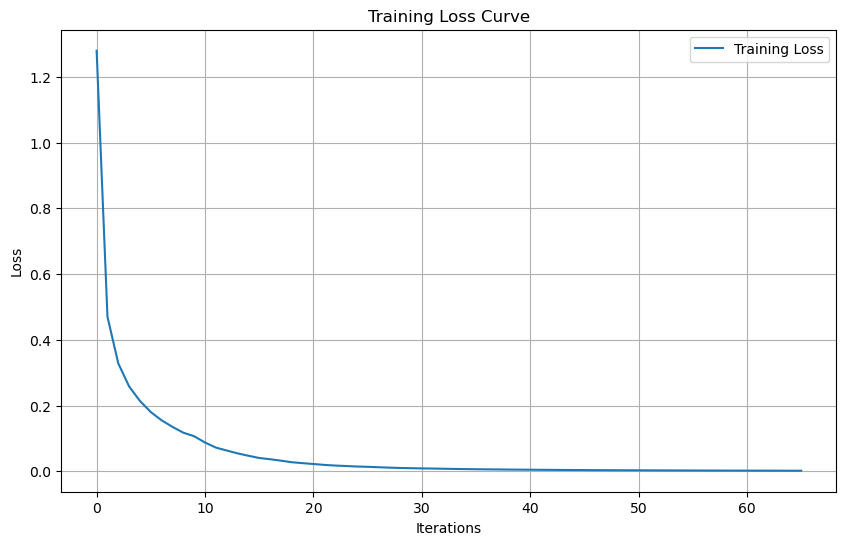

In [9]:


# Plot the training loss curve
if hasattr(clf, 'loss_curve_'):
    plt.figure(figsize=(10, 6))
    plt.plot(clf.loss_curve_, label='Training Loss')
    plt.title('Training Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print('No training loss curve available.')

In [14]:
y_pred = clf.predict(X_test)

In [16]:
pd.DataFrame(y_pred, y_test)

,0
class,
3,3
4,4
7,7
8,1
2,2
...,...
7,7
2,2
6,6


In [17]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
54535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X_test.iloc[0,:]

AttributeError: 'Series' object has no attribute 'reshape'

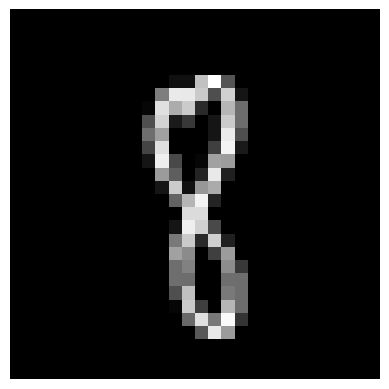

In [24]:
plt.imshow(X_test.iloc[3,:].values.reshape(28, 28), cmap='gray')  # Use 'gray' for grayscale; for RGB use no cmap
plt.axis('off')  # Optional: to hide the axes
plt.show()